# **Linear regression with various methods**


  This is a very simple example of using two scipy tools for linear regression.

*   Scipy.Polyfit
*   Stats.linregress
*   Optimize.curve_fit
*   numpy.linalg.lstsq
*   statsmodels.OLS
*   Analytic solution using Moore-Penrose generalized inverse or simple 
*   multiplicative matrix inverse
*   sklearn.linear_model.LinearRegression



### **Import libraries**

In [4]:
from scipy import linspace, polyval, polyfit, sqrt, stats, randn, optimize
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
%matplotlib inline

### **Generate random data of a sufficiently large size**

In [5]:
#Sample data creation
#number of points 
n=int(5e6)
t=np.linspace(-10,10,n)
#parameters
a=3.25; b=-6.5
x=polyval([a,b],t)
#add some noise
xn=x+3*randn(n)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.randn is deprecated and will be removed in SciPy 2.0.0, use numpy.random.randn instead
  if __name__ == '__main__':



### **Draw few random sample points and plot**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.randn is deprecated and will be removed in SciPy 2.0.0, use numpy.random.randn instead
  


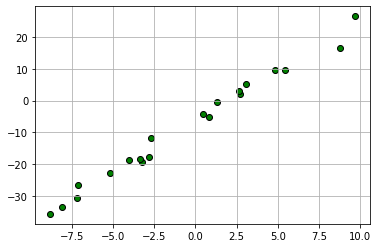

In [6]:
xvar=np.random.choice(t,size=20)
yvar=polyval([a,b],xvar)+3*randn(20)
plt.scatter(xvar,yvar,c='green',edgecolors='k')
plt.grid(True)
plt.show()


### **Method: Scipy.Polyfit**

In [10]:
#Linear regressison -polyfit - polyfit can be used other orders polynomials
t1=time.time()
(ar,br)=polyfit(t,xn,1)
xr=polyval([ar,br],t)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  after removing the cwd from sys.path.


In [11]:
#compute the mean square error
err=sqrt(sum((xr-xn)**2)/n)
t2=time.time()
t_polyfit = float(t2-t1)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  


In [12]:
print('Linear regression using polyfit')
print('parameters: a=%.2f b=%.2f, ms error= %.3f' % (ar,br,err))
print("Time taken: {} seconds".format(t_polyfit))

Linear regression using polyfit
parameters: a=3.25 b=-6.50, ms error= 2.999
Time taken: 19.97829580307007 seconds


### **Method: Stats.linregress**

In [13]:
#Linear regression using stats.linregress
t1=time.time()
(a_s,b_s,r,tt,stderr)=stats.linregress(t,xn)
t2=time.time()
t_linregress = float(t2-t1)

In [14]:
print('Linear regression using stats.linregress')
print('a=%.2f b=%.2f, std error= %.3f, r^2 coefficient= %.3f' % (a_s,b_s,stderr,r))
print("Time taken: {} seconds".format(t_linregress))

Linear regression using stats.linregress
a=3.25 b=-6.50, std error= 0.000, r^2 coefficient= 0.987
Time taken: 0.11377882957458496 seconds



### **Method: Optimize.curve_fit**

In [15]:
def flin(t,a,b):
    result = a*t+b
    return(result)

In [16]:
t1=time.time()
p1,_=optimize.curve_fit(flin,xdata=t,ydata=xn,method='lm')
t2=time.time()
t_optimize_curve_fit = float(t2-t1)

print('Linear regression using optimize.curve_fit')
print('parameters: a=%.2f b=%.2f' % (p1[0],p1[1]))
print("Time taken: {} seconds".format(t_optimize_curve_fit))

Linear regression using optimize.curve_fit
parameters: a=3.25 b=-6.50
Time taken: 0.5512099266052246 seconds


### **Method: numpy.linalg.lstsq**

In [18]:
t1=time.time()
A = np.vstack([t, np.ones(len(t))]).T
result = np.linalg.lstsq(A, xn)
ar,br = result[0]
err = np.sqrt(result[1]/len(xn))
t2=time.time()
t_linalg_lstsq = float(t2-t1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
print('Linear regression using numpy.linalg.lstsq')
print('parameters: a=%.2f b=%.2f, ms error= %.3f' % (ar,br,err))
print("Time taken: {} seconds".format(t_linalg_lstsq))

Linear regression using numpy.linalg.lstsq
parameters: a=3.25 b=-6.50, ms error= 2.999
Time taken: 0.1987612247467041 seconds


### **Method: Statsmodels.OLS**

In [20]:
t1=time.time()
t=sm.add_constant(t)
model = sm.OLS(x, t)
results = model.fit()
ar=results.params[1]
br=results.params[0]
t2=time.time()
t_OLS = float(t2-t1)

In [21]:
print('Linear regression using statsmodels.OLS')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_OLS))

Linear regression using statsmodels.OLS
parameters: a=3.25 b=-6.50
Time taken: 0.7224981784820557 seconds


In [22]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.888e+36
Date:                Sun, 05 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:48:50   Log-Likelihood:             1.5031e+08
No. Observations:             5000000   AIC:                        -3.006e+08
Df Residuals:                 4999998   BIC:                        -3.006e+08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.5000   9.52e-18  -6.83e+17      0.0

### **Analytic solution using Moore-Penrose pseudoinverse**

In [23]:
t1=time.time()
mpinv = np.linalg.pinv(t)
result = mpinv.dot(x)
ar = result[1]
br = result[0]
t2=time.time()
t_inv_matrix = float(t2-t1)

In [24]:
print('Linear regression using Moore-Penrose inverse')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_inv_matrix))

Linear regression using Moore-Penrose inverse
parameters: a=3.25 b=-6.50
Time taken: 0.467923641204834 seconds


### **Analytic solution using simple multiplicative matrix inverse**

In [25]:
t1=time.time()
m = np.dot((np.dot(np.linalg.inv(np.dot(t.T,t)),t.T)),x)
ar = m[1]
br = m[0]
t2=time.time()
t_simple_inv = float(t2-t1)

In [26]:
print('Linear regression using simple inverse')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_simple_inv))

Linear regression using simple inverse
parameters: a=3.25 b=-6.50
Time taken: 0.09409451484680176 seconds


### **Method: sklearn.linear_model.LinearRegression**

In [27]:
t1=time.time()
lm = LinearRegression()
lm.fit(t,x)
ar=lm.coef_[1]
br=lm.intercept_
t2=time.time()
t_sklearn_linear = float(t2-t1)

In [28]:
print('Linear regression using sklearn.linear_model.LinearRegression')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_sklearn_linear))

Linear regression using sklearn.linear_model.LinearRegression
parameters: a=3.25 b=-6.50
Time taken: 0.323413610458374 seconds


### **Conclusion:**

  We still need work over all the execution times in list and plot

### **Bucket all the execution times in a list and plot**

In [47]:
times = [t_polyfit,t_linregress,t_optimize_curve_fit,t_linalg_lstsq,t_OLS,t_inv_matrix,t_simple_inv,t_sklearn_linear]

## **Thank You!**